In [44]:
import os
import sys, traceback
import numpy as np
import struct
import PIL.Image
import matplotlib.pyplot as plt
import scipy.misc
import os.path
import binascii

%matplotlib inline
plt.rcParams['figure.figsize'] = (4.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [45]:
# 读取图像和对应的汉字
def read_from_gnt_dir(gnt_dir):
    def one_file(f):
        header_size = 10
        while True:
            header = np.fromfile(f, dtype='uint8', count=header_size)
            if not header.size: break
            sample_size = header[0] + (header[1]<<8) + (header[2]<<16) + (header[3]<<24)
            tagcode = header[5] + (header[4]<<8)
            width = header[6] + (header[7]<<8)
            height = header[8] + (header[9]<<8)
            if header_size + width*height != sample_size:
                break
            image = np.fromfile(f, dtype='uint8', count=width*height).reshape((height, width))
            yield image, tagcode

    for file_name in os.listdir(gnt_dir):
        if file_name.endswith('.gnt'):
            file_path = os.path.join(gnt_dir, file_name)
            with open(file_path, 'rb') as f:
                for image, tagcode in one_file(f):
                    yield image, tagcode

def resize_and_normalize_image(img):
    # 补方
    pad_size = abs(img.shape[0]-img.shape[1]) // 2
    if img.shape[0] < img.shape[1]:
        pad_dims = ((pad_size, pad_size), (0, 0))
    else:
        pad_dims = ((0, 0), (pad_size, pad_size))
    img = np.lib.pad(img, pad_dims, mode='constant', constant_values=255)
    # 缩放
    img = scipy.misc.imresize(img, (64 - 4*2, 64 - 4*2))
    img = np.lib.pad(img, ((4, 4), (4, 4)), mode='constant', constant_values=255)
    assert img.shape == (64, 64)

#     img = img.flatten()
#     像素值范围-1到1
#     img = (img - 128) / 128？
    return img

def write_image_to_dir(file_dir, image, tagcode):
    file = None
    if os.path.isfile(file_dir) is False:
        file = open(file_dir, 'wb')
    else:
        file = open(file_dir, 'ab')
    image = image.flatten()
    file.write(tagcode.astype('uint16'))
    file.write(image)
    file.close()


薯


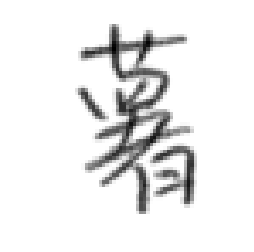

输


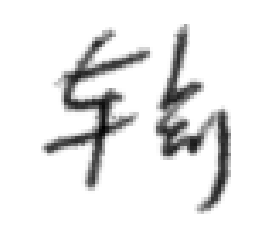

拜


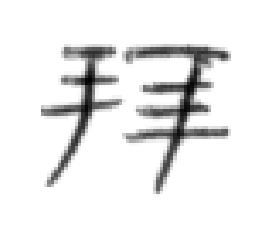

法


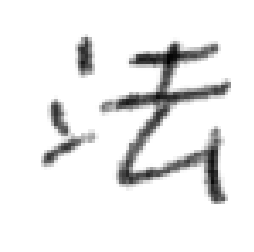

水


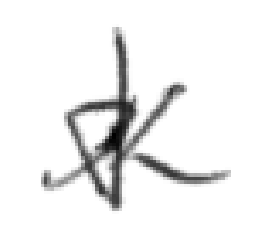

奋


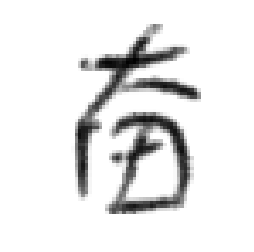

抑


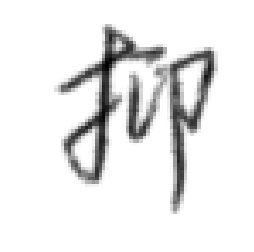

本


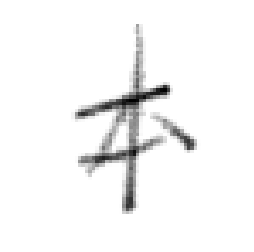

乓


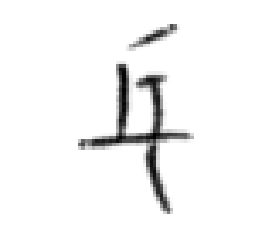

娱


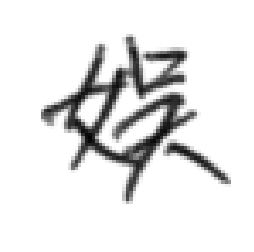

鼓


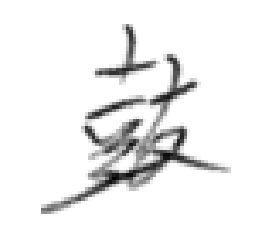

场


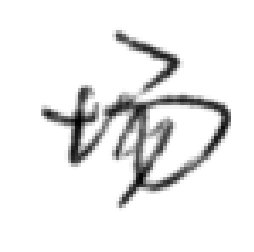

伟


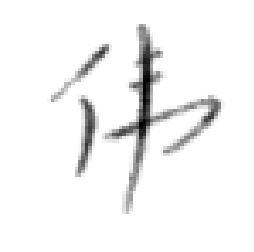

焊


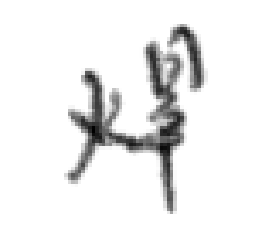

斥


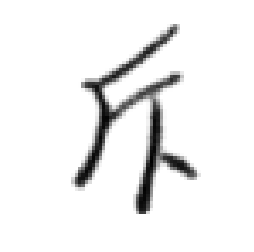

辽


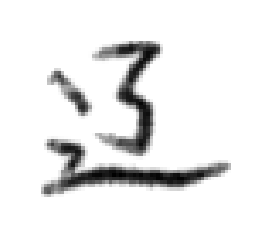

互


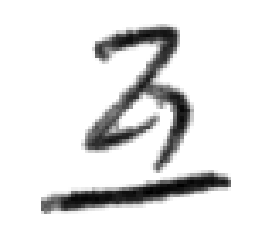

熄


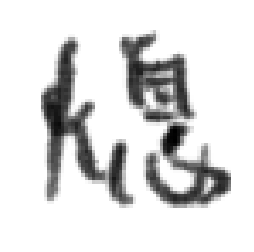

拢


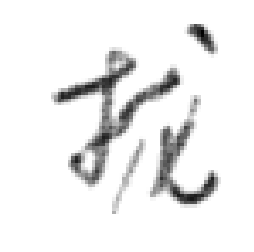

迹


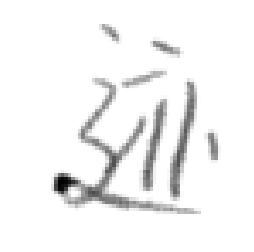

赚


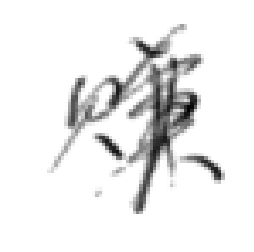

间


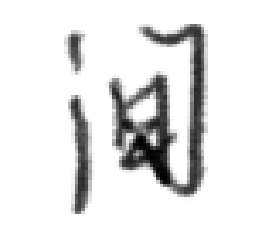

酗


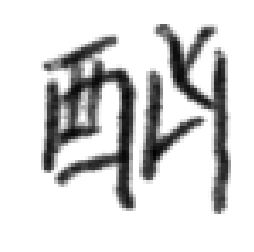

罪


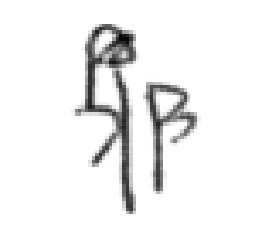

暑


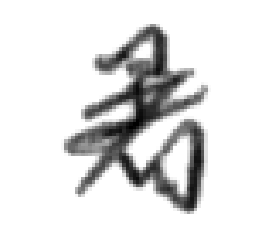

扳


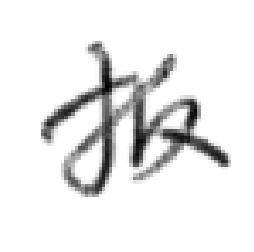

岁


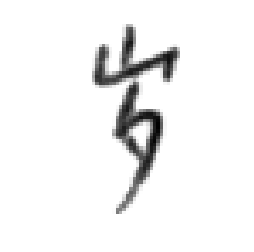

绷


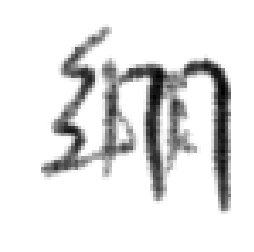

锁


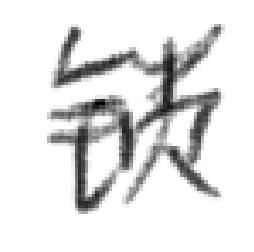

遂


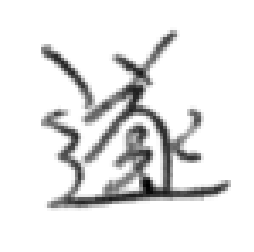

糯


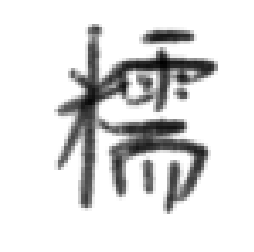

觉


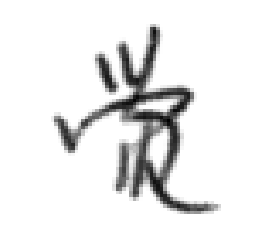

涌


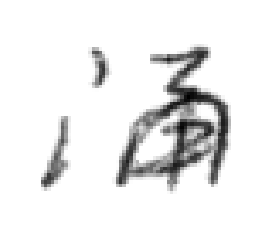

缘


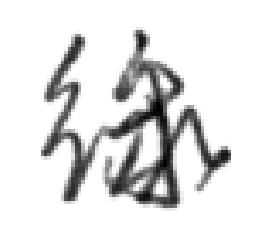

冠


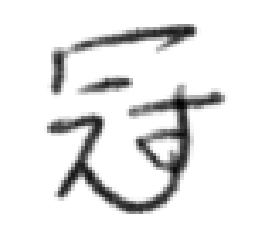

赠


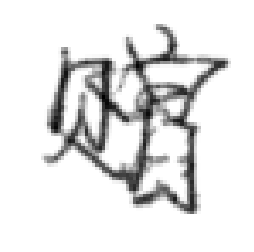

蠢


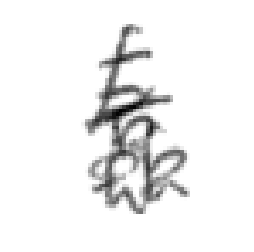

吝


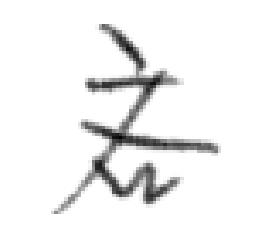

灵


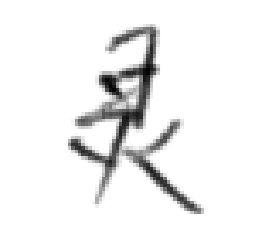

领


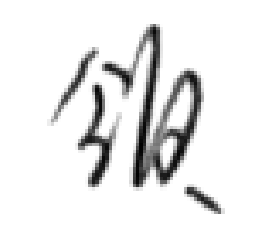

纶


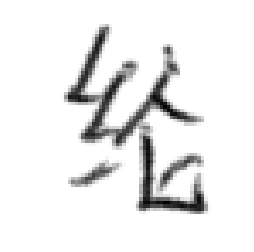

衫


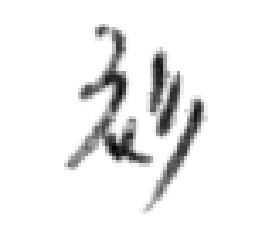

忌


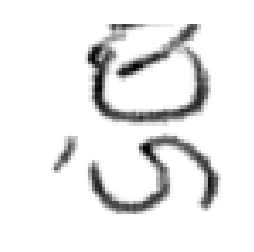

妹


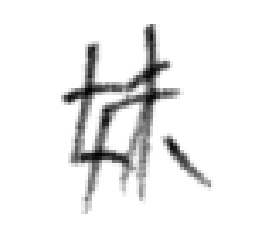

读


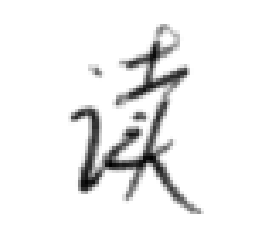

帆


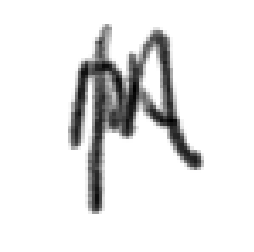

页


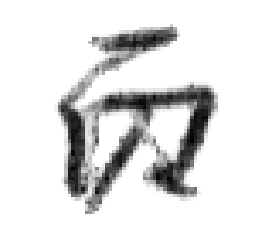

姚


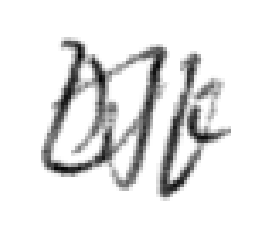

伊


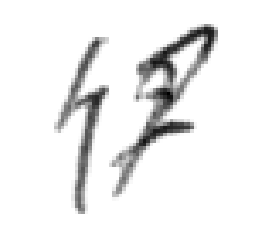

瓢


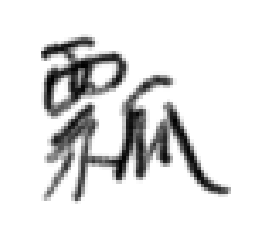

铂


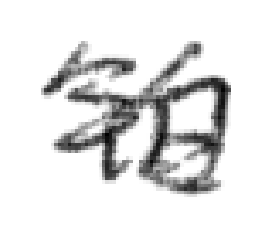

提


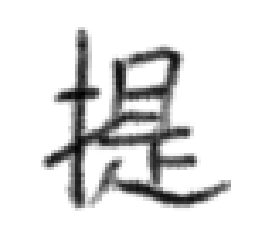

刻


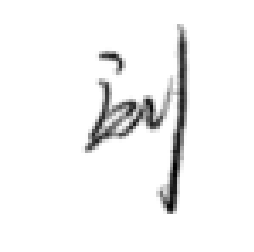

胯


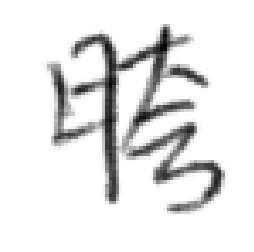

匡


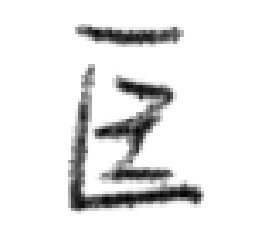

插


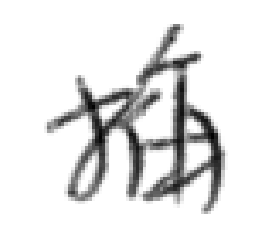

馆


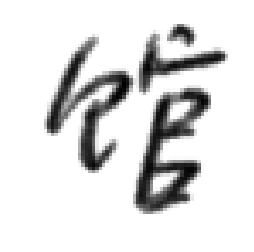

婉


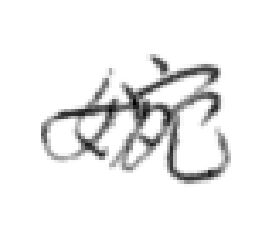

果


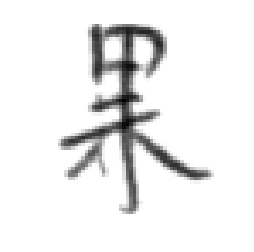

俐


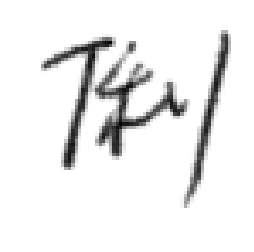

连


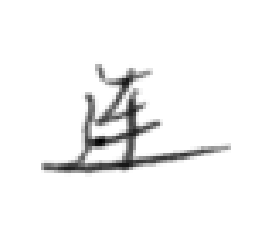

站


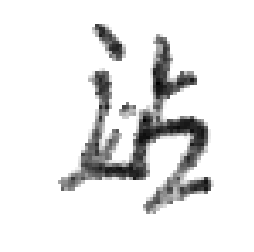

燃


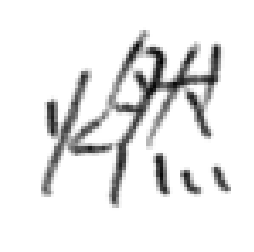

次


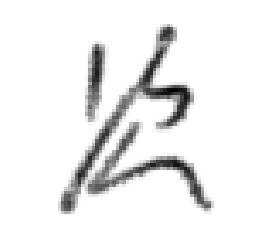

蝴


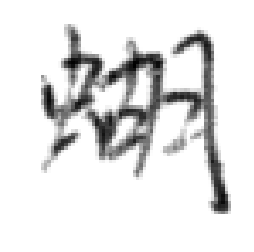

哗


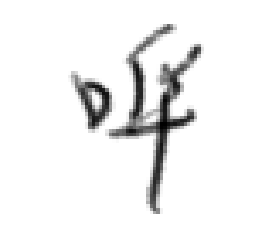

淮


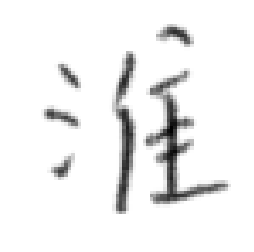

纫


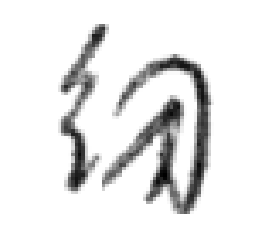

颅


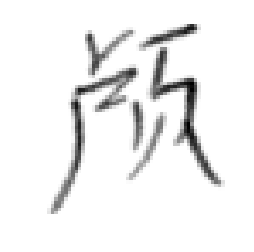

辑


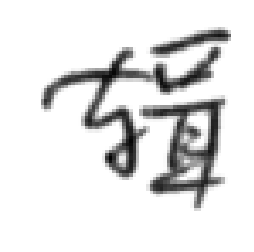

骡


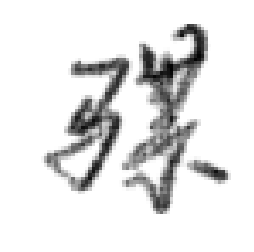

芒


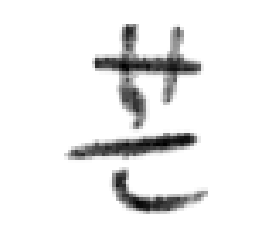

茂


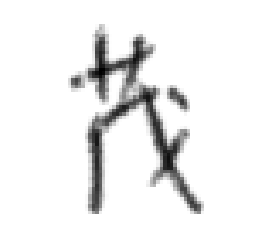

碍


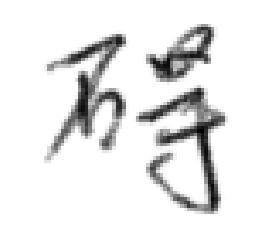

接


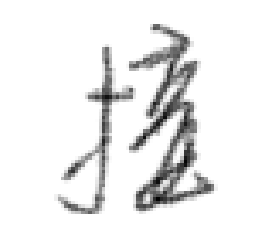

茎


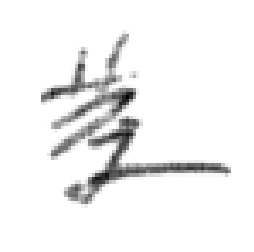

尽


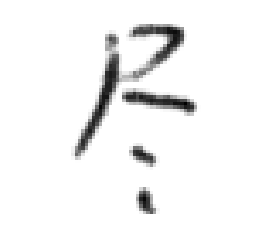

素


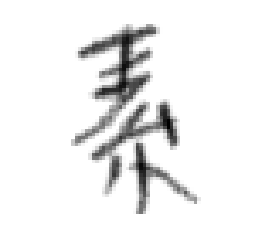

饱


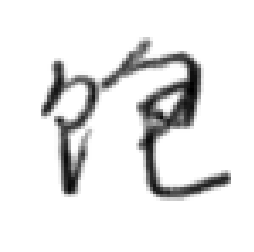

姨


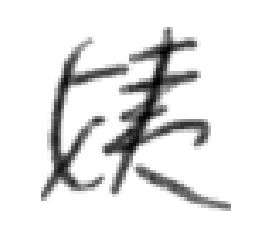

矣


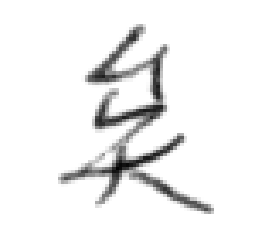

贬


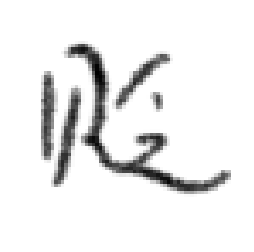

告


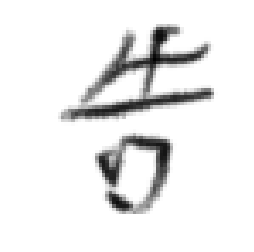

财


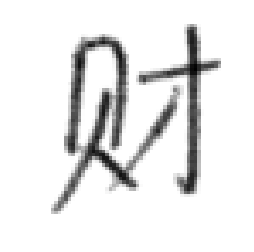

雨


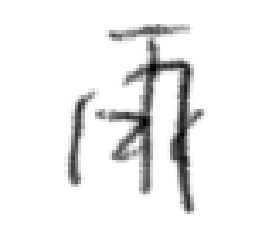

育


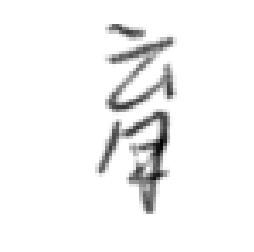

婉


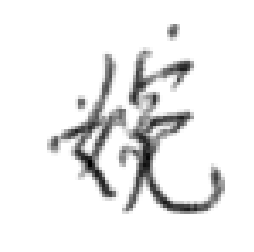

航


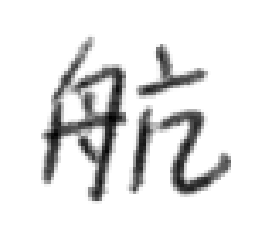

斋


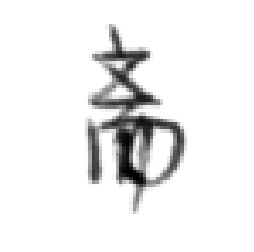

球


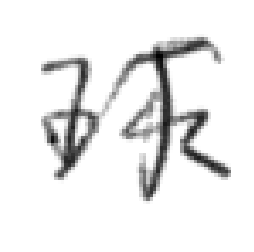

(897758, 223991)


In [46]:
train_data_dir = "/home/data/HWDB1-train/"
test_data_dir = "/home/data/HWDB1-test/"
train_binary = "/home/data/HWDB1-train/train.bin"
test_binary = "/home/data/HWDB1-test/test.bin"

# 统计样本数
train_counter = 0
test_counter = 0
for image, tagcode in read_from_gnt_dir(gnt_dir=train_data_dir):
    image = resize_and_normalize_image(image)
    write_image_to_dir(train_binary, image, tagcode)
    tagcode_unicode = struct.pack('>H', tagcode).decode('gb2312')
    # 提取点图像, 看看什么样
    if train_counter % 10000 == 0:
        im = PIL.Image.fromarray(image)
#         im.convert('RGB').save(tagcode_unicode.encode('ascii','ignore') + str(train_counter) + '.png')
        print(tagcode_unicode)
        plt.imshow(image)
#         plt.title('%s' % (tagcode_unicode))
        plt.axis('off')
        plt.show()
    train_counter += 1
for image, tagcode in read_from_gnt_dir(gnt_dir=test_data_dir):
    tagcode_unicode = struct.pack('>H', tagcode).decode('gb2312')
    test_counter += 1

# 样本数
print(train_counter, test_counter)

In [21]:
import binascii
x = np.array([[0, 1], [2, 3]]).astype('uint8')
print(type(x))
print(binascii.hexlify(x.tobytes()))

<type 'numpy.ndarray'>
00010203
